# Imports

In [1]:
import torchrain as tr # import torchrain 
from matplotlib import pyplot as plt

/data/envs/thesis_base/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


# Load OpenCML Dataset

In [2]:
open_cml_dataset = tr.read_open_cml_dataset('../data/open_cml.p') #  read OpenCML dataset

# Select Link and Plot link data

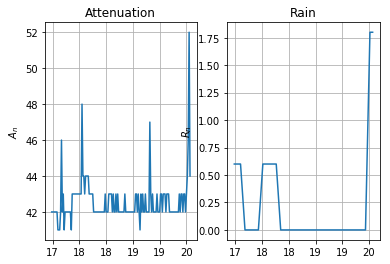

In [3]:
link_index = 0 
link_data = open_cml_dataset[link_index] # select a link 
link_data.plot() # plot link data

# Run rain estimation using constant baseline
 

In [4]:
tsc = tr.rain_estimation.two_step_constant_baseline(tr.power_law.PowerLawType.ITU,0.1,4,1.1) # init classification model
rain,wd = tsc(link_data.attenuation(),link_data.meta_data) # run classification method

AttributeError: 'int' object has no attribute 'lower'

In [ ]:
# plt.subplot(1, 2, 1)
# plt.plot(link_data.time, wd_classification.numpy()[0, :])
# plt.title('Classification')
# plt.xlabel('Time')
# tr.change_x_axis_time_format('%H')
# plt.grid()
# plt.subplot(1, 2, 2)
# plt.plot(link_data.time, std_vector.numpy()[0, :])
# plt.xlabel('Time')
# plt.title('Standard Deviation')
# tr.change_x_axis_time_format('%H')
# plt.ylabel(r'$\sigma_n$')
# plt.grid()
# plt.show()

# References
[1] 
